In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [90]:
df=pd.read_csv("/content/laptop_clean (1).csv", delimiter=",")
df.head()

,Unnamed: 0,laptop_ID,Company,Product,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,log_price
0,0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,7.200194
1,1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,6.801216
2,2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,6.354370
3,3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,7.838915
4,4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,7.497540


In [91]:
df.drop('Unnamed: 0', axis=1, inplace=True)# Dropping 'Unnamed: 0'
df.head()



,laptop_ID,Company,Product,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,log_price
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,7.200194
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,6.801216
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,6.354370
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,7.838915
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,7.497540


In [92]:
cols = ['Company','TypeName', 'Cpu_brand', 'Gpu_brand' ,'Product','Cpu','Gpu','OpSys']

# convrting categorical column to one hot encoded data
for col in cols:
    one = pd.get_dummies(df[col],prefix=col, drop_first=True)
    df = pd.concat([df,one],axis=1).drop(col,axis=1)


In [93]:
df.head()

,laptop_ID,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,HDD,SSD,log_price,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,8,1.37,1339.69,0,1,226.983005,0,128,7.200194,...,0,0,0,0,0,0,0,0,0,1
1,2,8,1.34,898.94,0,0,127.677940,0,0,6.801216,...,0,0,0,0,0,0,0,0,0,1
2,3,8,1.86,575.00,0,0,141.211998,0,256,6.354370,...,0,0,0,0,0,1,0,0,0,0
3,4,16,1.83,2537.45,0,1,220.534624,0,512,7.838915,...,0,0,0,0,0,0,0,0,0,1
4,5,8,1.37,1803.60,0,1,226.983005,0,256,7.497540,...,0,0,0,0,0,0,0,0,0,1


In [94]:
X = df.drop(columns=['Price_euros', 'log_price'])# separating target and features
y = df['log_price']


In [95]:
X.head()

,laptop_ID,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,8,1.37,0,1,226.983005,0,128,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,8,1.34,0,0,127.677940,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,8,1.86,0,0,141.211998,0,256,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,16,1.83,0,1,220.534624,0,512,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5,8,1.37,0,1,226.983005,0,256,1,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
y.head()

0    7.200194
1    6.801216
2    6.354370
3    7.838915
4    7.497540
Name: log_price, dtype: float64

In [97]:
X_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=2) 

In [ ]:
model_list=[]
score=[]

# #AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(x_test)
score.append(ada.score(x_test,y_test))
model_list.append('AdaBoostRegressor')

#BaggingRegressor
bag = BaggingRegressor()
bag.fit(X_train,y_train)
y_pred_bag = bag.predict(x_test)
score.append(bag.score(x_test,y_test))
model_list.append('BaggingRegressor')

#ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(X_train,y_train)
y_pred_ext = ext.predict(x_test)
score.append(ext.score(x_test,y_test))
model_list.append('ExtraTreesRegressor')

#GradientBoostingRegressor
gdb = GradientBoostingRegressor()
gdb.fit(X_train,y_train)
y_pred_gdb = gdb.predict(x_test)
score.append(gdb.score(x_test,y_test))
model_list.append('GradientBoostingRegressor')

#RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(x_test)
score.append(rf.score(x_test,y_test))
model_list.append('RandomForestRegressor')

# #XGBRegressor
# xgb = XGBRegressor()
# xgb.fit(X_train,y_train)
# y_pred_xgb = xgb.predict(x_test)
# score.append(xgb.score(x_test,y_test))
# model_list.append('XGBRegressor')

#LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(X_train,y_train)
y_pred_lgb = lgb.predict(x_test)
score.append(lgb.score(x_test,y_test))
model_list.append('LGBMRegressor')

#CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train,y_train)
y_pred_cat = cat.predict(x_test)
score.append(cat.score(x_test,y_test))
model_list.append('CatBoostRegressor')

#DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(x_test)
score.append(dt.score(x_test,y_test))
model_list.append('DecisionTreeRegressor')

#LinearRegression
lr =LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(x_test)
score.append(lr.score(x_test,y_test))
model_list.append('LinearRegression')

#KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(x_test)
score.append(knn.score(x_test,y_test))
model_list.append('KNeighborsRegressor')

#SVR RBF
svr = SVR()
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(x_test)
score.append(svr.score(x_test,y_test))
model_list.append('SVR RBF')


In [101]:
score


[0.8103255104332814,
 0.8675288463510664,
 0.8964212254153033,
 0.8839344558454831,
 0.8853607824182608,
 0.884482183447987,
 0.9120136113655333,
 0.8074364395859198,
 -2610470622662369.5,
 0.5708715434658844,
 0.6142070999096083]

In [102]:
model_list

['AdaBoostRegressor',
 'BaggingRegressor',
 'ExtraTreesRegressor',
 'GradientBoostingRegressor',
 'RandomForestRegressor',
 'LGBMRegressor',
 'CatBoostRegressor',
 'DecisionTreeRegressor',
 'LinearRegression',
 'KNeighborsRegressor',
 'SVR RBF']

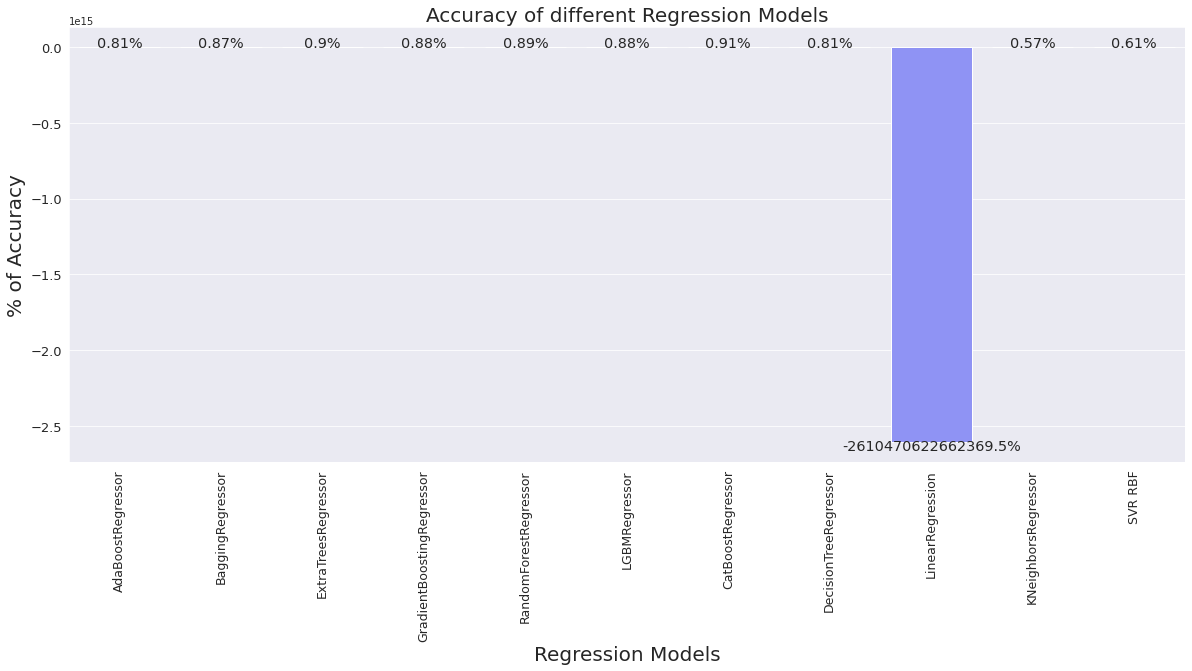

In [103]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=score, palette = "husl", saturation =2.0)
plt.xlabel('Regression Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Regression Models', fontsize = 20)
plt.xticks(fontsize = 12.5, horizontalalignment = 'center', rotation='vertical')
plt.yticks(fontsize = 13)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show() 

In [ ]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('r1', cat), ('r3', lgb), ('r4', rf)])
er.fit(X_train, y_train)

In [106]:
er.score(x_test, y_test)

0.9057222148654791

In [107]:
pred = np.exp(er.predict(x_test))
pred_df = pd.DataFrame(columns=['Predictions', 'Actual'])


In [111]:
pred_df['Predictions'] = pred
pred_df['Actual'] = df['Price_euros']
pred_df.head(10)

,Predictions,Actual
0,749.759909,1339.69
1,294.237921,898.94
2,1917.000015,575.00
3,1481.126635,2537.45
4,2368.179983,1803.60
5,797.653644,400.00
6,1161.240186,2139.97
7,1554.827206,1158.70
8,383.378835,1495.00
9,1319.007713,770.00


In [112]:
import pickle
pickle.dump(er,open('model.pkl','wb'))

In [114]:
model=pickle.load(open('model.pkl','rb'))
